# 1. Data Cleaning

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Loading the Shark Attack dataset
df = pd.read_csv("C:\\Users\\mafal\\Documents\\ironhack\\projects\\archive\\attacks.csv", encoding="latin1", sep= ",")
df.head()

Case Number         Date    Year        Type    Country             Area  \
0  2018.06.25  25-Jun-2018  2018.0     Boating        USA       California   
1  2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2  2018.06.09  09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3  2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4  2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                         Location     Activity             Name Sex   ...  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe    F  ...   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely     F  ...   
2                    Habush, Oahu      Surfing      John Denges    M  ...   
3              Arrawarra Headland      Surfing             male    M  ...   
4                        La Ticla  Free diving   Gustavo Ramos     M  ...   

          Species           Investigator or Source                       pdf  \
0      White shark                R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1              NaN  K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2              NaN  K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3        2 m shark                  B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4  Tiger shark, 3m                       A .Kipper      2018.06.04-Ramos.pdf   

                                        href formula  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...   
1  http://sharkattackfile.net/spreadsheets/pdf_di...   
2  http://sharkattackfile.net/spreadsheets/pdf_di...   
3  http://sharkattackfile.net/spreadsheets/pdf_di...   
4  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                href Case Number.1  \
0  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.18   
2  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.09   
3  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.08   
4  http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.04   

  Case Number.2 original order Unnamed: 22 Unnamed: 23  
0    2018.06.25         6303.0         NaN         NaN  
1    2018.06.18         6302.0         NaN         NaN  
2    2018.06.09         6301.0         NaN         NaN  
3    2018.06.08         6300.0         NaN         NaN  
4    2018.06.04         6299.0         NaN         NaN  

[5 rows x 24 columns]

#### -> Renaming columns and dropping unnecessary columns

In [3]:
#Checking what columns we have
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [4]:
#Checking how many rows we have 
df.shape

(25723, 24)

In [5]:
#Standadarzing column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip('_')
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

---------------------------------------------------------------------------------------------
The following columns don't give us many insights for our prediction 
so we'll remove them from our data frame: 

'Investigator or Source', 'pdf', 'href formula', 'href',

'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22','Unnamed: 23'

-------------------------------------------------------------------------------------

In [6]:
#Dropping unnecessary columns
df.drop(['investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'], axis=1, inplace=True)
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case_number  8702 non-null   object 
 1   date         6302 non-null   object 
 2   year         6300 non-null   float64
 3   type         6298 non-null   object 
 4   country      6252 non-null   object 
 5   area         5847 non-null   object 
 6   location     5762 non-null   object 
 7   activity     5758 non-null   object 
 8   name         6092 non-null   object 
 9   sex          5737 non-null   object 
 10  age          3471 non-null   object 
 11  injury       6274 non-null   object 
 12  fatal_(y/n)  5763 non-null   object 
 13  time         2948 non-null   object 
 14  species      3464 non-null   object 
dtypes: float64(1), object(14)
memory usage: 2.9+ MB


#### -> Checking for NaNs and standardizing each column if necessary

##### 1. Case Number

In [8]:
#Checking if we can drop all the rows in which case_number is null
df[df['case_number'].isnull()]

case_number                  date    year      type country     area  \
5488          NaN  Reported 06-Sep-1905  1905.0  Provoked     USA  Florida   
8702          NaN                   NaN     NaN       NaN     NaN      NaN   
8703          NaN                   NaN     NaN       NaN     NaN      NaN   
8704          NaN                   NaN     NaN       NaN     NaN      NaN   
8705          NaN                   NaN     NaN       NaN     NaN      NaN   
...           ...                   ...     ...       ...     ...      ...   
25717         NaN                   NaN     NaN       NaN     NaN      NaN   
25718         NaN                   NaN     NaN       NaN     NaN      NaN   
25719         NaN                   NaN     NaN       NaN     NaN      NaN   
25720         NaN                   NaN     NaN       NaN     NaN      NaN   
25721         NaN                   NaN     NaN       NaN     NaN      NaN   

                           location activity         name  sex  age  \
5488   Fort Pierce, St Lucie County  Fishing  David Curry    M  NaN   
8702                            NaN      NaN          NaN  NaN  NaN   
8703                            NaN      NaN          NaN  NaN  NaN   
8704                            NaN      NaN          NaN  NaN  NaN   
8705                            NaN      NaN          NaN  NaN  NaN   
...                             ...      ...          ...  ...  ...   
25717                           NaN      NaN          NaN  NaN  NaN   
25718                           NaN      NaN          NaN  NaN  NaN   
25719                           NaN      NaN          NaN  NaN  NaN   
25720                           NaN      NaN          NaN  NaN  NaN   
25721                           NaN      NaN          NaN  NaN  NaN   

                                                  injury fatal_(y/n) time  \
5488   Lacerations to leg from hooked shark PROVOKED ...           N  NaN   
8702                                                 NaN         NaN  NaN   
8703                                                 NaN         NaN  NaN   
8704                                                 NaN         NaN  NaN   
8705                                                 NaN         NaN  NaN   
...                                                  ...         ...  ...   
25717                                                NaN         NaN  NaN   
25718                                                NaN         NaN  NaN   
25719                                                NaN         NaN  NaN   
25720                                                NaN         NaN  NaN   
25721                                                NaN         NaN  NaN   

      species  
5488      NaN  
8702      NaN  
8703      NaN  
8704      NaN  
8705      NaN  
...       ...  
25717     NaN  
25718     NaN  
25719     NaN  
25720     NaN  
25721     NaN  

[17021 rows x 15 columns]

----------------------------------------------------------------------------------------------
Since the entire rows are made of NaNs when case_number is null we'll be dropping these rows as
they don't add any insights to our model
----------------------------------------------------------------------------------------------

In [9]:
#Drop the rows that all of them are Nans
df.dropna(how='all', inplace=True)
df['case_number'].isna().sum()

1

In [10]:
# We still have one null
df[df['case_number'].isnull()]

case_number                  date    year      type country     area  \
5488         NaN  Reported 06-Sep-1905  1905.0  Provoked     USA  Florida   

                          location activity         name sex  age  \
5488  Fort Pierce, St Lucie County  Fishing  David Curry   M  NaN   

                                                 injury fatal_(y/n) time  \
5488  Lacerations to leg from hooked shark PROVOKED ...           N  NaN   

     species  
5488     NaN

In [11]:
#Checking if when case_number is 0, all the other columns are also NaNs
df[df['case_number'].str.strip() == '0']

case_number date  year type country area location activity name  sex  \
6302           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6303           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6304           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6305           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
6306           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
...          ...  ...   ...  ...     ...  ...      ...      ...  ...  ...   
8697           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
8698           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
8699           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
8700           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   
8701           0  NaN   NaN  NaN     NaN  NaN      NaN      NaN  NaN  NaN   

      age injury fatal_(y/n) time species  
6302  NaN    NaN         NaN  NaN     NaN  
6303  NaN    NaN         NaN  NaN     NaN  
6304  NaN    NaN         NaN  NaN     NaN  
6305  NaN    NaN         NaN  NaN     NaN  
6306  NaN    NaN         NaN  NaN     NaN  
...   ...    ...         ...  ...     ...  
8697  NaN    NaN         NaN  NaN     NaN  
8698  NaN    NaN         NaN  NaN     NaN  
8699  NaN    NaN         NaN  NaN     NaN  
8700  NaN    NaN         NaN  NaN     NaN  
8701  NaN    NaN         NaN  NaN     NaN  

[2400 rows x 15 columns]

In [12]:
#Dropping all rows in which the columns are all null but in case_number
df.dropna(subset=df.columns.difference(['case_number']), how='all', inplace=True)
df[df['case_number'].str.strip() == '0']

Empty DataFrame
Columns: [case_number, date, year, type, country, area, location, activity, name, sex, age, injury, fatal_(y/n), time, species]
Index: []

--------------------------------------------------------------------------------------------------------
case_number is still having however weird values, such as dates and letters. 

To standardize 
this column we can replace it by the number of the row plus one (row_number + 1), so that all rows are unique

--------------------------------------------------------------------------------------------------------

In [13]:
#Replacing case_number with the row index + 1 (so the first case_number isn't 0 or NaN)
df['case_number'] = df.index + 1
df.head()

case_number         date    year        type    country             area  \
0            1  25-Jun-2018  2018.0     Boating        USA       California   
1            2  18-Jun-2018  2018.0  Unprovoked        USA          Georgia   
2            3  09-Jun-2018  2018.0     Invalid        USA           Hawaii   
3            4  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4            5  04-Jun-2018  2018.0    Provoked     MEXICO           Colima   

                         location     activity             name sex  age  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe   F   57   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely    F   11   
2                    Habush, Oahu      Surfing      John Denges   M   48   
3              Arrawarra Headland      Surfing             male   M  NaN   
4                        La Ticla  Free diving   Gustavo Ramos    M  NaN   

                                              injury fatal_(y/n)  \
0  No injury to occupant, outrigger canoe and pad...           N   
1                         Minor injury to left thigh           N   
2       Injury to left lower leg from surfboard skeg           N   
3                          Minor injury to lower leg           N   
4  Lacerations to leg & hand shark PROVOKED INCIDENT           N   

            time          species  
0          18h00      White shark  
1  14h00  -15h00              NaN  
2          07h45              NaN  
3            NaN        2 m shark  
4            NaN  Tiger shark, 3m

In [14]:
#Checking if case_number is now an int instead of object
df['case_number'].dtype

dtype('int64')

##### 2. Date

In [15]:
#Funtion that turns all values in date into actual dates
from dateutil import parser

def convert_to_datetime(df, column_name):
    def parse_date(row):
        try:
            # Try to parse the date using dateutil.parser
            parsed_date = parser.parse(row[column_name], dayfirst=True)
            
            # Check if the year is before 1677 
            #(The default range for pandas datetime objects is from 1677-09-21 00:12:43.145225 
            #to 2262-04-11 23:47:16.854775.),otherwise it returns out of bounds error
            if parsed_date.year < 1677:
                # If before 1677, return '01-01-1677'
                return '01-01-1678'
            
            # Extract only the date part from the parsed datetime object
            date_only = parsed_date.strftime('%d-%m-%Y')
            
            return date_only
        
        except Exception:
            # If there is an error in parsing, return a default value
            return '01-01-1900'  # Adjust the default value as per your requirement
    
    df[column_name] = df.apply(parse_date, axis=1)
    return df

In [16]:
#Converting all dates into actual dates using the previous function
df = convert_to_datetime(df, 'date')

In [17]:
#Checking row 4644 because it returns an error in the next cell due to this date
print(df.iloc[4644])
#Replacing the date for this specif row it its correct year
df.loc[4644, 'date'] = '22-07-1944'
print('----------------------')
print(df.iloc[4644])

case_number                                   4645
date                                    01-01-1678
year                                        1944.0
type                                    Unprovoked
country                               SOUTH AFRICA
area                         Western Cape Province
location                                 Hartenbos
activity                                  Swimming
name                                Albert Schmidt
sex                                              M
age                                             17
injury                   FATAL, body not recovered
fatal_(y/n)                                      Y
time                                         16h30
species        White shark, according to witnesses
Name: 4644, dtype: object
----------------------
case_number                                   4645
date                                    22-07-1944
year                                        1944.0
type                             

In [18]:
#Converting column date to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df['date'].dtype)
df.head()

datetime64[ns]


case_number       date    year        type    country             area  \
0            1 2018-06-25  2018.0     Boating        USA       California   
1            2 2018-06-18  2018.0  Unprovoked        USA          Georgia   
2            3 2018-06-09  2018.0     Invalid        USA           Hawaii   
3            4 2018-06-08  2018.0  Unprovoked  AUSTRALIA  New South Wales   
4            5 2018-06-04  2018.0    Provoked     MEXICO           Colima   

                         location     activity             name sex  age  \
0     Oceanside, San Diego County     Paddling      Julie Wolfe   F   57   
1  St. Simon Island, Glynn County     Standing  Adyson McNeely    F   11   
2                    Habush, Oahu      Surfing      John Denges   M   48   
3              Arrawarra Headland      Surfing             male   M  NaN   
4                        La Ticla  Free diving   Gustavo Ramos    M  NaN   

                                              injury fatal_(y/n)  \
0  No injury to occupant, outrigger canoe and pad...           N   
1                         Minor injury to left thigh           N   
2       Injury to left lower leg from surfboard skeg           N   
3                          Minor injury to lower leg           N   
4  Lacerations to leg & hand shark PROVOKED INCIDENT           N   

            time          species  
0          18h00      White shark  
1  14h00  -15h00              NaN  
2          07h45              NaN  
3            NaN        2 m shark  
4            NaN  Tiger shark, 3m

##### 3. Year

In [19]:
# Replace non-finite values with a specific value (e.g., 1900) and converting column year from float to int
df['year'] = df['year'].replace([np.nan, 0], 1900)
df['year'] = df['year'].astype(int)
df['year'].dtype

df['year'].value_counts()

year
2015    143
1900    140
2017    136
2016    130
2011    128
       ... 
1787      1
1786      1
1785      1
1784      1
5         1
Name: count, Length: 248, dtype: int64

##### 4. Type

In [20]:
#Function that replaces the type with 'Sea Disaster' for types with the word 'Boat'
def replace_type(df, column_name):
    # Replace NaN values with 'Invalid'
    df[column_name] = df[column_name].fillna('Invalid')
    
    # Use string methods to check if 'boat' is present in 'type' column (ignore case)
    condition = df[column_name].str.contains('boat', case=False)
    
    # Replace values that meet the condition with 'Sea Disaster'
    df.loc[condition, column_name] = 'Questionable'
    
    return df

In [21]:
#Standadizing the types to have only: 'Unprovoked', 'Provoked', 'Invalid', 'Sea Disaster', 'Questionable'
df = replace_type(df, 'type')
df['type'].value_counts()

type
Unprovoked      4595
Provoked         574
Invalid          551
Questionable     343
Sea Disaster     239
Name: count, dtype: int64

##### 5. Country

In [22]:
#Making sure all countries are set with upper case
df['country'] = df['country'].str.upper().str.replace(r'\W', ' ', regex=True).str.strip(' ')

In [23]:
# Set the display options to show all values without truncation
pd.set_option('display.max_rows', None)
df['country'].value_counts(dropna=False).sort_index()

country
ADMIRALTY ISLANDS                           1
AFRICA                                      1
ALGERIA                                     1
AMERICAN SAMOA                              3
ANDAMAN   NICOBAR ISLANDAS                  1
ANDAMAN ISLANDS                             1
ANGOLA                                      1
ANTIGUA                                     2
ARGENTINA                                   1
ARUBA                                       1
ASIA                                        1
ATLANTIC OCEAN                             17
AUSTRALIA                                1338
AZORES                                      5
BAHAMAS                                   109
BAHREIN                                     1
BANGLADESH                                  1
BARBADOS                                    6
BAY OF BENGAL                               1
BELIZE                                      3
BERMUDA                                    16
BETWEEN PORTUGAL   INDIA  

--------------------------------------------------------------------------------------------------
Because we have some invalid countries (eg. 'BETWEEN PORTUGAL & INDIA', 'DIEGO GARCIA', ) and a few NaN
we'll check if these countris are on the all_countries pandas library and if not mark as 'UNKNOWN'

---------------------------------------------------------------------------------------------------

In [24]:
#Installing and importing geonamescache library to have a list of all countries 
#to compare with our column country
!pip install geonamescache
import geonamescache

gc = geonamescache.GeonamesCache()
all_countries = list(gc.get_countries_by_names().keys())

# Add 'Djibouti' to the list
all_countries.append('Djibouti')

#Turning all countries upper case so we can compare later with our country column
all_countries = [country.upper() for country in all_countries]
print(all_countries)

['ANDORRA', 'UNITED ARAB EMIRATES', 'AFGHANISTAN', 'ANTIGUA AND BARBUDA', 'ANGUILLA', 'ALBANIA', 'ARMENIA', 'ANGOLA', 'ANTARCTICA', 'ARGENTINA', 'AMERICAN SAMOA', 'AUSTRIA', 'AUSTRALIA', 'ARUBA', 'ALAND ISLANDS', 'AZERBAIJAN', 'BOSNIA AND HERZEGOVINA', 'BARBADOS', 'BANGLADESH', 'BELGIUM', 'BURKINA FASO', 'BULGARIA', 'BAHRAIN', 'BURUNDI', 'BENIN', 'SAINT BARTHELEMY', 'BERMUDA', 'BRUNEI', 'BOLIVIA', 'BONAIRE, SAINT EUSTATIUS AND SABA ', 'BRAZIL', 'BAHAMAS', 'BHUTAN', 'BOUVET ISLAND', 'BOTSWANA', 'BELARUS', 'BELIZE', 'CANADA', 'COCOS ISLANDS', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'CENTRAL AFRICAN REPUBLIC', 'REPUBLIC OF THE CONGO', 'SWITZERLAND', 'IVORY COAST', 'COOK ISLANDS', 'CHILE', 'CAMEROON', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CUBA', 'CABO VERDE', 'CURACAO', 'CHRISTMAS ISLAND', 'CYPRUS', 'CZECHIA', 'GERMANY', 'DJIBOUTI', 'DENMARK', 'DOMINICA', 'DOMINICAN REPUBLIC', 'ALGERIA', 'ECUADOR', 'ESTONIA', 'EGYPT', 'WESTERN SAHARA', 'ERITREA', 'SPAIN', 'ETHIOPIA', 'FINLAND', 'FIJI', 'FALKLAND

--------------------------------------------------------------------------------------------------------
The bellow function iterates over each row of the DataFrame using iterrows(). 

-> It checks if the value in the "country" column exists in the all_countries list:

    1. If it doesn't, it checks if the value in the "area" column contains a country that exists in the all_countries list or if country contains a country in the all_countries list. 

    2. If it does, it replaces the value in the "country" column with that extracted_country name using df.at[index, 'country'] = extracted_country.

    3. If the extracted_country is not found in all_countries, it replaces the country with the string 'UNKNOWN' using df.at[index, 'country'] = 'UNKNOWN'.

----------------------------------------------------------------------------------------------------------

In [25]:
#Importing regex
import re

#Function to replaces the country name 
#If a value doesn't exist, it will check if the country name appears in the "area" column. 
#If it does, it will replace the value with the country name.
def replace_country(df, country_column, area_column, all_countries):
    # Replace NaN values with 'Unknown'
    df[country_column] = df[country_column].fillna('UNKNOWN')
    
    #Iterating over each row of the DataFrame using iterrows()
    for index, row in df.iterrows():
        country = str(row[country_column])  # Ensure the value is a string
        area = str(row[area_column])  # Ensure the value is a string
        area = area.upper() #Ensuring it is in upper case like all_countries
        
        #Check if Country is "OKINAWA" or "CEYLON" replace with "JAPAN" and "SRI LANKA", respectively
        if country == 'OKINAWA':
            country = 'JAPAN'
        elif country == 'CEYLON':
            country = 'SRI LANKA'
        elif country == 'USA':
            country = 'UNITED STATES'
        
        # Check if any country name from all_countries exists in the area/country and extracts the country
        pattern = r"\b(" + "|".join(all_countries) + r")\b"
        match_country = re.search(pattern, country, flags=re.IGNORECASE)
        match_area = re.search(pattern, area, flags=re.IGNORECASE)
        
        if match_country:
            extracted_country = match_country.group(0)
        else:
            if match_area:
                extracted_country = match_area.group(0)
            else:
                extracted_country = None
        
        #Checking if the value in the "country" column exists in the all_countries list
        if country in all_countries:
            df.at[index, country_column] = country
        #If it doesn't, it checks if the value in the "area" column exists in the all_countries list
        else:
            if extracted_country in all_countries: 
                df.at[index, country_column] = extracted_country
            #Otherwise it replaces the country with the string 'UNKNOWN'
            else:
                df.at[index, country_column] = 'UNKNOWN'
    
    return df

In [26]:
#Replacing the countries with valid values using the previous function
df = replace_country(df,'country', 'area', all_countries)
pd.set_option('display.max_rows', None)
df['country'].value_counts(dropna=False).sort_index()

country
ALGERIA                           1
AMERICAN SAMOA                    3
ANGOLA                            1
ARGENTINA                         1
ARUBA                             1
AUSTRALIA                      1340
BAHAMAS                         109
BANGLADESH                        1
BARBADOS                          6
BELIZE                            3
BERMUDA                          17
BRAZIL                          113
BRITISH VIRGIN ISLANDS            1
CANADA                           12
CAYMAN ISLANDS                    2
CHILE                             8
CHINA                             8
COMOROS                           1
COOK ISLANDS                      1
COSTA RICA                       17
CROATIA                          34
CUBA                             46
CURACAO                           1
CYPRUS                            1
DJIBOUTI                          1
DOMINICAN REPUBLIC                7
ECUADOR                          10
EGYPT               

##### 6. Area

In [27]:
#Making sure all areas are set with upper case
df['area'] = df['area'].str.upper().str.replace(r'\W', ' ', regex=True).str.strip(' ')

# Set the display options to show all values without truncation
df['area'].value_counts(dropna=False).sort_index()

area
04 05N 13 23W                                                        1
1 000 MILES EAST OF HAWAII                                           1
1000 MILES WEST OF HAWAII                                            2
10ºS  142ºE                                                          1
12 MILES OFF THE NORTH COAST                                         1
150 MILES OFFSHORE                                                   1
165  MILES FROM BERMUDA                                              1
180 MILES SOUTHEAST OF OKINAWA                                       1
18S   50E                                                            1
19S  178 E                                                           1
2 TO 3 MILES OFF TABOGUILLA ISLAND  PACIFIC OCEAN                    1
200 NM SOUTHEAST OF MANILA                                           1
22ºN  88ºE                                                           4
25 KM OFF THE COAST OF IRAN   483KM FROM MOUTH OF PERSIAN GULF       1
2

--------------------------------------------------------------------------------------------------------
Since we're having a lot of distinct values, we'll check:

    1. if the area cointains an existing region in the pycountry library and replace area with {region_name}, {country}. 

    2. if not we'll check if it has the word "North", "Central", "South", "East", "West" and change area for {North, Central, South, East, West},{COUNTRY}
--------------------------------------------------------------------------------------------------------

In [28]:
#Installing it
!pip install pycountry

#Importing a Python package that provides a comprehensive collection of country-related data. 
import pycountry

#Function that returns a list of regions for a given country
def get_cities_by_country(country_name):
    country_code = None
    subdivisions_list = []  # Initialize an empty list to store the subdivision names
    
    for country in pycountry.countries:
        if country.name == country_name:
            country_code = country.alpha_2
            break
    
    if country_code:
        for subdivision in pycountry.subdivisions.get(country_code=country_code):
            subdivisions_list.append(subdivision.name)  # Add subdivision name to the list
        
        return subdivisions_list  # Return the list of subdivision names
    else:
        return ''  # Return empty list if country not found

In [29]:
#Function that replaces the area with a valid region, 
#or area (North, Central, South, East, West) and country_name
def replace_area(df, country_column, area_column):
    #List of regions
    regions = []
    
    #Iterating over each row of the DataFrame using iterrows()
    for index, row in df.iterrows():
        # Ensure the value is a string and turns 'SRI LANKA' into 'Sri Lanka', for example
        country = str(row[country_column]).title()  
        # Ensure the value is a string
        area = str(row[area_column]).title()  
        
        regions = [city for city in get_cities_by_country(country)]
        
        extracted_region = None
        
        #In case there's a list of regions we extract the area
        if regions != []:
            # Check if area cointains a region in the list
            pattern = r"\b(" + "|".join(map(re.escape, regions)) + r")\b"
            match_area = re.search(pattern, area, flags=re.IGNORECASE)

            if match_area:
                extracted_region = match_area.group(0) + ', ' + country
            #If there are no matches in regions list, then we check if words in area are within a region
            #For example 'Veracruz' should match 'Veracruz de Ignacio de la Llave'
            else:
                pattern = r"\b" + re.escape(area) + r"\b"

                for region in regions:
                    if re.search(pattern, region, flags=re.IGNORECASE):
                        extracted_region = region + ', ' + country
                        break
            
            #In case there were no matches at all we check if there's key words like 
            #'north', 'south', 'west', 'east', 'central'
            if extracted_region == None:
                pattern = r"(north|south|west|east|central)"
                match_area = re.search(pattern, area, flags=re.IGNORECASE)

                if match_area:
                    extracted_region = match_area.group(0) + ', ' + country
    
        #Replacing the area with the extracted_region in case there was a match
        if extracted_region != None:
            df.at[index, area_column] = extracted_region
        else:
            df.at[index, area_column] = 'UNKNOWN'

    return df

In [30]:
#Replacing the areas with valid values using the previous function
df = replace_area(df,'country', 'area')
pd.set_option('display.max_rows', None)
df['area'].value_counts(dropna=False).sort_index()

area
Aichi, Japan                                       1
Alabama, United States                            15
Alagoas, Brazil                                    2
Alaska, United States                              1
Alpes-de-Haute-Provence, France                    1
Ancona, Italy                                      1
Antofagasta, Chile                                 1
Antsiranana, Madagascar                            1
Bahia, Brazil                                      3
Baja California Sur, Mexico                        1
Baja California, Mexico                           10
Bali, Indonesia                                    6
Banaadir, Somalia                                  4
Batanes, Philippines                               1
Batangas, Philippines                              1
Bayelsa, Nigeria                                   1
Berry Islands, Bahamas                             2
Bimini, Bahamas                                    7
Bocas Del Toro, Panama                   

##### 7. Location

-------------------------------------------------------------------------------------------------------
Location might not be a relevant column for us, so we'll drop eventually possibly

-----------------------------------------------------------------------------------------------------

##### 8. Activity

----------------------------------------------------------------------------------------------------------
For column 'activity' we'll divide it into categories: 

-> swimming: including any injury containing words 'swimming', 'swimm', 'bathing', 'dangling', 'floating'

-> diving: including words such as 'dive', 'diving', 'scuba', 'dived''

-> fishing: 'chase', 'catch','catching', 'attract', 'attracting','fishing', 'fish', 'retrieve', 'net', 'collecting', 'crabbing', 'crayfishing', 'feeding', 'rescuing', 'rescue','trap

-> water sport: 'board', 'canoe', 'surf', 'surfing', 'boarding', 'canoeing', 'paddle', 'paddling'

-> sailing: 'boat', 'sailing', 'sail', 'ship', 'sailboat', 'adrift', 'adrifting', 'conducting', 'cruise', 'cruising', 'anchor', 'escape', 'escaping', 'yacht','yachting'

-> air disaster: 'air', 'aircraft', 'crashed'

-> unknown: For anything else

---------------------------------------------------------------------------------------------------------

In [31]:
#Function that replaces the activity with its respective category
def replace_activity(df, activity_column):
    for index, row in df.iterrows():
        activity = str(row[activity_column]).lower()  # Convert to lowercase for case insensitivity
        
        
        # Check for specific keywords/categories using string matching
        if any(keyword in activity for keyword in ['swimming', 'swimm', 'bathing', 'dangling', 'floating']):
            df.at[index, activity_column] = 'swimming'

        elif any(keyword in activity for keyword in ['dive', 'diving', 'scuba', 'dived']):
            df.at[index, activity_column] = 'diving' 

        elif any(keyword in activity for keyword in ['chase', 'catch','catching', 'attract', 
                                                     'attracting','fishing', 'fish', 'retrieve', 'net', 
                                                     'collecting', 'crabbing', 'crayfishing', 'feeding', 
                                                     'rescuing', 'rescue','trap']):
            df.at[index, activity_column] = 'fishing'
        
        elif any(keyword in activity for keyword in ['board', 'canoe', 'surf', 'surfing', 'boarding', 
                                                     'canoeing', 'paddle', 'paddling']):
            df.at[index, activity_column] = 'water sport'
        
        elif any(keyword in activity for keyword in ['boat', 'sailing', 'sail', 'ship', 'sailboat', 
                                                     'adrift', 'adrifting', 'conducting', 'cruise', 
                                                     'cruising', 'anchor', 'escape', 'escaping', 'yacht',
                                                     'yachting']):
            df.at[index, activity_column] = 'sailing'
            
        elif any(keyword in activity for keyword in ['air', 'aircraft', 'crashed']):
            df.at[index, activity_column] = 'air disaster'

        else:
            df.at[index, activity_column] = 'unknown'
            
    return df

In [32]:
#Replacing the activities using the above function
df = replace_activity(df, 'activity')
df['activity'].value_counts(dropna=False).sort_index()

activity
air disaster      29
diving           609
fishing         1213
sailing          187
swimming        1367
unknown         1410
water sport     1487
Name: count, dtype: int64

##### 9. Name

In [33]:
name = df['name'].value_counts()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(name)

name
male                                                                                                                                                                                                                              550
female                                                                                                                                                                                                                             97
boy                                                                                                                                                                                                                                23
2 males                                                                                                                                                                                                                            16
boat                                                                       

------------------------------------------------------------------------------------------------------
Like Location name might not be very relevant for our model, therefore we'll probably drop it too 

------------------------------------------------------------------------------------------------------

##### 10. Sex

In [34]:
#Replacing 'sex' column with 'm', 'f' and 'o'
df['sex'] = df['sex'].replace({'M': 'm', 'F': 'f', 'N': 'o', 'lli': 'o', '.': 'o', 'M ': 'm'})
df['sex'].value_counts()

sex
m    5096
f     637
o       4
Name: count, dtype: int64

##### 11. Age

----------------------------------------------------------------------------------------------------------
For age we'll divide all ges into categories such as:

-> child: 0-12

-> teenage: 13-17

-> young Adult: 18-30

-> adult: 30-49

-> middle-age: 50-64

-> elderly: 65+

-----------------------------------------------------------------------------------------------------------

In [35]:
#Function that replaces the ages whith its age category
def replace_age(age):
    if pd.isnull(age):  # Check for missing values
        return 'unknown'
    age = age.lower()  # Convert to lowercase for case insensitivity
    
    # Check for specific patterns using regular expressions
    if re.search(r'\d+', age):  # Check for any digit in the string
        age_number = int(re.findall(r'\d+', age)[0])  # Extract the first digit as the age number
        
        if re.search(r'mid-\d+s', age):  # Check for the 'mid-30s' or 'mid-20s' pattern
            age_number = age_number + 5  # Extract the number from the pattern and 5 more years
            if age_number >= 20 and age_number <= 30:
                return 'young-adult'
            elif age_number >= 30 and age_number <= 49:
                return 'adult'
            else:
                return 'unknown'
        
        elif age_number >= 0 and age_number <= 12:
            return 'child'
        elif age_number >= 13 and age_number <= 17:
            return 'teenager'
        elif age_number >= 18 and age_number <= 30:
            return 'young-adult'
        elif age_number >30 and age_number <= 49:
            return 'adult'
        elif age_number >= 50 and age_number <= 64:
            return 'middle-age'
        elif age_number >= 65:
            return 'elderly'
        else:
            return 'unknown'
    
    elif re.search(r'child', age):  # Check for the presence of 'child' in the string
        return 'child'
    
    elif re.search(r'teen', age):  # Check for the presence of 'teen' in the string
        return 'teenager'
    
    elif age.startswith('young'):
        return 'young-adult'
    
    elif re.search(r'adult', age):  # Check for the (adult)' pattern
        return 'adult'
    
    elif age.startswith('middle'):
        return 'middle-age'
    
    else:
        return 'unknown'
    

In [36]:
#Applying replace_age funtion to the 'age' column
df['age'] = df['age'].apply(replace_age)

# Print the updated DataFrame
df['age'].value_counts(dropna=False).sort_index()

age
adult           823
child           293
elderly          54
middle-age      249
teenager        647
unknown        2842
young-adult    1394
Name: count, dtype: int64

##### 12. Injury

------------------------------------------------------------------------------------------------------
For column injury we'll also divide it into categories: 

-> injured: including any injury containing words 'injured', 'laceration', 'bite', 'wound', 'gash',
    'scratch', 'cut','bitten', 'mauled', 'teeth', 'recovered','serious', 'tooth', 'puncture', 'severed'

-> dead: including words such as 'perish', 'dead', 'death', 'body', 'bodies', 'lost', 'remains'

-> no injury: 'hoax', 'no injury', 'survived', 'survive'

-> unknown: For anything else

----------------------------------------------------------------------------------------------------------

In [37]:
#Fuction that replaces the injury with a set category given a keyword 
def replace_injury(df, injury_column):
    for index, row in df.iterrows():
        injury = str(row[injury_column]).lower()  # Convert to lowercase for case insensitivity

        # Check for specific keywords/categories using string matching
        if any(keyword in injury for keyword in ['injured', 'laceration', 'lacerated','bite', 'wound', 'gash', 'scratch', 
                                                   'injuries', 'injury','cut', 'bitten', 'mauled', 'teeth', 'recovered', 'serious', 
                                                   'tooth', 'puncture', 'severed']):
            if any(keyword in injury for keyword in ['no injury']):
                df.at[index, injury_column] = 'no injury'
            elif any(keyword in injury for keyword in ['perish', 'perished', 'dead', 'death', 'body', 'bodies', 'lost', 'remains', 'died']):
                df.at[index, injury_column] = 'dead'
            else:
                df.at[index, injury_column] = 'injured'

        elif any(keyword in injury for keyword in ['hoax', 'no injury','survived', 'survive']):
            if any(keyword in injury for keyword in ['perish', 'perished','dead', 'death', 'body', 'bodies', 'lost', 'remains', 'died']):
                df.at[index, injury_column] = 'dead'
            else:
                df.at[index, injury_column] = 'no injury'

        elif any(keyword in injury for keyword in ['perish', 'dead', 'death', 'body', 'bodies', 'lost', 'remains', 'died']):
            df.at[index, injury_column] = 'dead'

        else:
            df.at[index, injury_column] = 'unknown'
            
    return df

In [38]:
#Applying the previous function to the 'injury' column
df = replace_injury(df, 'injury')
df['injury'].value_counts()

injury
injured      3650
unknown      1390
no injury     926
dead          336
Name: count, dtype: int64

##### 13. Fatal

In [39]:
#Renaming column fatalas we are adding 'u' for unknown
df = df.rename(columns={"fatal_(y/n)": "fatal(y/n/u)"})

In [40]:
df['fatal(y/n/u)'].value_counts()

fatal(y/n/u)
N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: count, dtype: int64

In [41]:
#Replacing values with a valid value
df['fatal(y/n/u)'] = df['fatal(y/n/u)'].replace({'UNKNOWN': 'u', 'M': 'u', ' N': 'n', '2017': 'u', 'N ': 'n', 'Y': 'y', 'N': 'n'})

In [42]:
df['fatal(y/n/u)'].unique()

array(['n', 'y', nan, 'u'], dtype=object)

In [43]:
#Filling the NaNs with 'u'
df.fillna('u', inplace=True)

In [44]:
df['fatal(y/n/u)'].value_counts()

fatal(y/n/u)
n    4301
y    1389
u     612
Name: count, dtype: int64

##### 14. Time

-------------------------------------------------------------------------------------
For column time, we'll split into the following categories:

Morning, Midday, Afternoon, Evening and Night

------------------------------------------------------------------------------------------------

In [45]:
#Fuction that replaces the time with its category
def standarize_time(value):
    if pd.isna(value) or value == '--' or value == '':
        return 'Unknown'
    elif 'h' in value:
        try:
            hour = int(value.split('h')[0])
            if 6 <= hour < 10:
                return 'Morning'
            elif 10 <= hour < 14:
                return 'Midday'
            elif 14 <= hour < 17:
                return 'Afternoon'
            elif 17 <= hour < 21:
                return 'Evening'
            else:
                return 'Night'
        except ValueError:
            return 'Unknown'
    elif 'Morning' in value or 'AM' in value:
        return 'Morning'
    elif 'Midday' in value:
        return 'Midday'
    elif 'Afternoon' in value or 'PM' in value:
        return 'Afternoon'
    elif 'Night' in value or 'Evening' in value:
        return 'Night'
    else:
        return 'Unknown'

In [46]:
#Applying the previous function to time
df['time'] = df['time'].apply(standarize_time)

In [47]:
df['time'].value_counts()

time
Unknown      3594
Afternoon     901
Midday        847
Morning       456
Evening       411
Night          93
Name: count, dtype: int64

##### 15. Species

In [48]:
#Replacing the NaN with 'unknown'
df['species'].fillna("unknown", inplace=True)
df.loc[~df['species'].str.contains('shark', case=False), 'species'] = 'unknown'

-------------------------------------------------------------------------------------------------------
The Function bellow checks:

    1. if the value contains the word 'shark'
    
        1.1 if it does then we fetch the word before shark and shark and save it as the species
        1.2 if there's no other word before shark then we mark as 'unknown'
        1.3 if the string value doesn't contain the word 'shark' then we mark as 'unknown'
        
--------------------------------------------------------------------------------------------------------

In [49]:
#Fuction that fetches the species from the strings that compose column species
def replace_species(df, species_column):
    for index, row in df.iterrows():
        species = str(row[species_column]).lower() # Convert to lowercase for case insensitivity
        
        #Clearing numbers from the string
        species = re.sub(r'\d+', '', species)
    
        if 'shark' in species:
            # Retrieve the word before 'shark' and the word 'shark' itself
            excluded_words = ['small', 'large', 'big', 'another', 'from', 'foot', 
                              'same', 'two', 'young', 'old', 'female', 'male']
            pattern = r'(\b(?!(?:{}|\d+)\b)\w{{3,}}\s+shark\b)'.format('|'.join(excluded_words))
            match = re.search(pattern, species, re.IGNORECASE)
            if match:
                df.at[index, species_column] = match.group(1)
            else:
                df.at[index, species_column] = 'unknown'
        else:
            # Replace species without the word 'shark' with 'unknown'
            df.at[index, species_column] = 'unknown'
        
    
    return df

In [50]:
#Applying the above function to replace the species column with valid values
df = replace_species(df, 'species')

df['species'].value_counts()

species
unknown               4408
white shark            629
tiger shark            257
bull shark             172
nurse shark             97
whaler shark            65
reef shark              65
blacktip shark          61
mako shark              53
wobbegong shark         46
spinner shark           44
raggedtooth shark       43
hammerhead shark        42
blue shark              38
lemon shark             37
zambesi shark           28
sandtiger shark         20
whitetip shark          19
sand shark              16
dusky shark             14
sevengill shark         11
carpet shark             8
galapagos shark          7
gill shark               7
sandbar shark            7
basking shark            7
angel shark              6
dog shark                6
colored shark            6
porbeagle shark          6
juvenile shark           5
copper shark             5
brown shark              4
silky shark              4
thresher shark           3
whale shark              3
zambezi shark       

-------------------------------------------------------------------------------------------------------
Before doing the logistic regression and data analysis we are going to do some filtering for the countries and species:

    1. Countries: we are going to filter it by the top 10 countries that had the most shark attacks
    2. Species: we are going to filter out the species that only have 1 count
        
--------------------------------------------------------------------------------------------------------

In [51]:
df1 = df.copy()

**Countries**

Creating a filter for countries

In [52]:
df1['country'].value_counts()

country
UNITED STATES                  2229
AUSTRALIA                      1340
SOUTH AFRICA                    580
UNKNOWN                         231
PAPUA NEW GUINEA                135
NEW ZEALAND                     128
BRAZIL                          113
BAHAMAS                         109
MEXICO                           90
ITALY                            72
FIJI                             66
PHILIPPINES                      62
REUNION                          61
NEW CALEDONIA                    53
CUBA                             46
MOZAMBIQUE                       45
SPAIN                            44
JAPAN                            41
EGYPT                            41
INDIA                            40
CROATIA                          34
PANAMA                           33
SOLOMON ISLANDS                  31
IRAN                             31
JAMAICA                          27
FRENCH POLYNESIA                 25
GREECE                           25
HONG KONG           

In [53]:
#The top 10 countries are the following: United States, Australia, South Africa, Papua New Guinea, New Zealand, Brazil, Bahamas, Mexico, Italy and Unknown

top_10 = ['UNITED STATES', 'AUSTRALIA', 'SOUTH AFRICA', 'UNKNOWN', 'PAPUA NEW GUINEA', 'NEW ZEALAND', 'BRAZIL', 'BAHAMAS', 'MEXICO', 'ITALY']
df1_top_10 = df1[df1['country'].isin(top_10)]

**Species**

Creating a filter for species

In [54]:
#We are going to filter out all the type of species that the count is under 5

species_count = df1['species'].value_counts()
species_attacks = species_count[species_count > 4].index
df1_species_attacks = df1[df1['species'].isin(species_attacks)]

**Combine both**

In [55]:
df2 = df1.copy()

In [56]:
df2 = df1_top_10[df1_top_10['species'].isin(species_attacks)]

In [57]:
df2['country'].value_counts()

country
UNITED STATES       2209
AUSTRALIA           1331
SOUTH AFRICA         569
UNKNOWN              228
PAPUA NEW GUINEA     133
NEW ZEALAND          124
BRAZIL               113
BAHAMAS              109
MEXICO                89
ITALY                 72
Name: count, dtype: int64

In [58]:
df2['species'].value_counts()

species
unknown              3415
white shark           570
tiger shark           207
bull shark            123
nurse shark            91
whaler shark           65
blacktip shark         55
reef shark             45
wobbegong shark        45
raggedtooth shark      43
spinner shark          43
mako shark             41
hammerhead shark       39
lemon shark            31
blue shark             28
sandtiger shark        17
sand shark             16
zambesi shark          14
sevengill shark        11
dusky shark            10
carpet shark            8
sandbar shark           7
gill shark              7
basking shark           7
colored shark           6
dog shark               6
copper shark            5
whitetip shark          5
juvenile shark          5
porbeagle shark         5
galapagos shark         4
angel shark             3
Name: count, dtype: int64

In [59]:
df_filtered = df2

#Dropping columns like location and name as they wont't be relevant for our model
df_filtered.drop(['case_number','location','name', 'date'], axis=1, inplace=True)

df_filtered

C:\Users\mafal\AppData\Local\Temp\ipykernel_11552\3221114765.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['case_number','location','name', 'date'], axis=1, inplace=True)


year          type           country  \
0     2018  Questionable     UNITED STATES   
1     2018    Unprovoked     UNITED STATES   
2     2018       Invalid     UNITED STATES   
3     2018    Unprovoked         AUSTRALIA   
4     2018      Provoked            MEXICO   
5     2018    Unprovoked         AUSTRALIA   
6     2018    Unprovoked            BRAZIL   
7     2018    Unprovoked     UNITED STATES   
8     2018    Unprovoked     UNITED STATES   
9     2018    Unprovoked     UNITED STATES   
10    2018      Provoked         AUSTRALIA   
11    2018    Unprovoked     UNITED STATES   
12    2018    Unprovoked     UNITED STATES   
13    2018       Invalid           UNKNOWN   
14    2018      Provoked         AUSTRALIA   
15    2018    Unprovoked      SOUTH AFRICA   
16    2018  Questionable         AUSTRALIA   
19    2018    Unprovoked         AUSTRALIA   
20    2018  Questionable         AUSTRALIA   
21    2018    Unprovoked         AUSTRALIA   
22    2018    Unprovoked         AUSTRALIA   
24    2018    Unprovoked      SOUTH AFRICA   
25    2018    Unprovoked     UNITED STATES   
27    2018    Unprovoked            BRAZIL   
28    2018    Unprovoked         AUSTRALIA   
29    2018    Unprovoked         AUSTRALIA   
30    2018    Unprovoked           BAHAMAS   
31    2018       Invalid            BRAZIL   
33    2018    Unprovoked           BAHAMAS   
34    2018    Unprovoked      SOUTH AFRICA   
35    2018    Unprovoked     UNITED STATES   
36    2018    Unprovoked         AUSTRALIA   
37    2018    Unprovoked         AUSTRALIA   
38    2018    Unprovoked         AUSTRALIA   
39    2018    Unprovoked      SOUTH AFRICA   
40    2018    Unprovoked         AUSTRALIA   
41    2018      Provoked         AUSTRALIA   
42    2018    Unprovoked         AUSTRALIA   
43    2018       Invalid         AUSTRALIA   
44    2018       Invalid            BRAZIL   
46    2018       Invalid         AUSTRALIA   
47    2018    Unprovoked         AUSTRALIA   
49    2018    Unprovoked         AUSTRALIA   
50    2018    Unprovoked         AUSTRALIA   
51    2018    Unprovoked            BRAZIL   
52    2018    Unprovoked         AUSTRALIA   
53    2017    Unprovoked     UNITED STATES   
54    2017    Unprovoked     UNITED STATES   
56    2017    Unprovoked           BAHAMAS   
60    2017    Unprovoked     UNITED STATES   
61    2017    Unprovoked     UNITED STATES   
62    2017    Unprovoked           UNKNOWN   
63    2017    Unprovoked         AUSTRALIA   
66    2017    Unprovoked         AUSTRALIA   
67    2017    Unprovoked     UNITED STATES   
69    2017    Unprovoked     UNITED STATES   
70    2017    Unprovoked     UNITED STATES   
71    2017    Unprovoked         AUSTRALIA   
72    2017    Unprovoked       NEW ZEALAND   
73    2017    Unprovoked     UNITED STATES   
74    2017    Unprovoked     UNITED STATES   
75    2017    Unprovoked     UNITED STATES   
76    2017       Invalid      SOUTH AFRICA   
77    2017    Unprovoked     UNITED STATES   
78    2017    Unprovoked         AUSTRALIA   
79    2017       Invalid     UNITED STATES   
80    2017    Unprovoked     UNITED STATES   
81    2017    Unprovoked     UNITED STATES   
83    2017    Unprovoked     UNITED STATES   
84    2017       Invalid      SOUTH AFRICA   
86    2017  Questionable         AUSTRALIA   
87    2017    Unprovoked     UNITED STATES   
88    2017    Unprovoked         AUSTRALIA   
89    2017    Unprovoked         AUSTRALIA   
91    2017    Unprovoked      SOUTH AFRICA   
93    2017    Unprovoked     UNITED STATES   
94    2017    Unprovoked     UNITED STATES   
95    2017    Unprovoked     UNITED STATES   
96    2017    Unprovoked         AUSTRALIA   
97    2017    Unprovoked     UNITED STATES   
99    2017    Unprovoked       NEW ZEALAND   
100   2017    Unprovoked     UNITED STATES   
101   2017    Unprovoked           BAHAMAS   
102   2017    Unprovoked     UNITED STATES   
104   2017      Provoked     UNITED STATES   
105   2017  Questionable     UNITED STATES   
106 

# 2.Logistic Regression

## 2.1 EDA

In [60]:
# install data visualization libraries
!pip install matplotlib
!pip install seaborn

In [61]:
#Importing necessary visualizations
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

------------------------------------------------------------------------------------------------
Now we'll create contingency tables

------------------------------------------------------------------------------------------------

In [62]:
#Printing a contingency table for each column of the dataframe with fatal as the key column
for col in df_filtered.select_dtypes('object'):
    
    # Create a contingency table
    contingency_table = pd.crosstab(df_filtered[col], df_filtered['fatal(y/n/u)'])

    # Convert the values to percentages
    row_sums = contingency_table.sum(axis=1)
    col_sums = contingency_table.sum(axis=0)
    
    contingency_table["y"] = contingency_table["y"] / contingency_table["y"].sum() * 100
    contingency_table["n"] = contingency_table["n"] / contingency_table["n"].sum() * 100
    contingency_table["u"] = contingency_table["u"] / contingency_table["u"].sum() * 100

    # Print the contingency table in percentage
    display(contingency_table)

fatal(y/n/u)          n          u          y
type                                         
Invalid        0.384615  87.983707   0.709220
Provoked      12.829670   0.814664   1.300236
Questionable   7.802198   1.832994   0.591017
Sea Disaster   1.153846   0.610998  10.401891
Unprovoked    77.829670   8.757637  86.997636

fatal(y/n/u)              n          u          y
country                                          
AUSTRALIA         25.109890  27.291242  33.451537
BAHAMAS            2.582418   1.018330   1.182033
BRAZIL             1.758242   2.036660   4.609929
ITALY              1.098901   3.665988   1.654846
MEXICO             0.989011   2.036660   5.082742
NEW ZEALAND        2.417582   2.647658   2.718676
PAPUA NEW GUINEA   1.978022   0.814664   6.737589
SOUTH AFRICA      10.906593  13.441955  12.529551
UNITED STATES     49.972527  41.547862  21.985816
UNKNOWN            3.186813   5.498982  10.047281

fatal(y/n/u)                                     n          u          y
area                                                                    
Alabama, United States                    0.302198   0.203666   0.354610
Alagoas, Brazil                           0.027473   0.000000   0.118203
Ancona, Italy                             0.000000   0.000000   0.118203
Bahia, Brazil                             0.054945   0.203666   0.000000
Baja California Sur, Mexico               0.000000   0.000000   0.118203
Baja California, Mexico                   0.137363   0.407332   0.354610
Berry Islands, Bahamas                    0.054945   0.000000   0.000000
Bimini, Bahamas                           0.164835   0.203666   0.000000
Bougainville, Papua New Guinea            0.164835   0.000000   0.236407
Brindisi, Italy                           0.000000   0.203666   0.000000
Calabria, Italy                           0.054945   0.000000   0.118203
California, United States                 6.483516   5.906314   2.245863
Campeche, Mexico                          0.000000   0.000000   0.118203
Central Eleuthera, Bahamas                0.109890   0.000000   0.000000
Central, Papua New Guinea                 0.274725   0.203666   1.300236
Chatham Islands Territory, New Zealand    0.054945   0.000000   0.000000
Colima, Mexico                            0.082418   0.000000   0.118203
Connecticut, United States                0.137363   0.203666   0.000000
Delaware, United States                   0.164835   0.203666   0.000000
East New Britain, Papua New Guinea        0.192308   0.000000   0.236407
East Sepik, Papua New Guinea              0.027473   0.000000   0.118203
East, New Zealand                         0.027473   0.000000   0.000000
East, South Africa                        0.027473   0.000000   0.000000
East, United States                       0.027473   0.000000   0.118203
Eastern Cape, South Africa                3.379121   2.443992   2.718676
Exuma, Bahamas                            0.164835   0.203666   0.118203
Florida, United States                   25.027473  14.867617   5.555556
Genova, Italy                             0.000000   0.000000   0.118203
Georgia, United States                    0.302198   0.000000   0.354610
Guam, United States                       0.027473   0.000000   0.000000
Guerrero, Mexico                          0.109890   0.203666   0.945626
Gulf, Papua New Guinea                    0.027473   0.000000   0.118203
Hawaii, United States                     5.796703   7.942974   5.437352
Illinois, United States                   0.000000   0.203666   0.000000
Imperia, Italy                            0.000000   0.000000   0.118203
Kentucky, United States                   0.027473   0.000000   0.000000
Liguria, Italy                            0.082418   0.203666   0.000000
Louisiana, United States                  0.247253   0.203666   0.118203
Madang, Papua New Guinea                  0.302198   0.203666   1.063830
Maine, United States                      0.027473   0.000000   0.000000
Manus, Papua New Guinea                   0.137363   0.000000   0.354610
Maranhão, Brazil                          0.082418   0.203666   0.118203
Maryland, United States                   0.137363   0.000000   0.236407
Massachusetts, United States              0.274725   0.203666   0.472813
Messina, Italy                            0.027473   0.000000   0.000000
Milne Bay, Papua New Guinea               0.109890   0.000000   0.472813
Mississippi, United States                0.082418   0.000000   0.236407
Missouri, United States                   0.027473   0.000000   0.000000
Morobe, Papua New Guinea                  0.082418   0.000000   0.472813
New Ireland, Papua New Guinea             0.247253   0.203666   1.300236
New Jersey, United States                 1.126374   1.018330   0.709220
New Mexico, United States                 0.027473   0.000000   0.000000
New Providence, Bahamas                   0.219780   0.000

fatal(y/n/u)          n          u          y
activity                                     
air disaster   0.137363   1.221996   0.945626
diving         8.351648  11.608961  10.520095
fishing       21.181319  12.423625  11.465721
sailing        1.510989   4.684318   5.555556
swimming      15.906593  22.199593  39.243499
unknown       20.686813  35.641548  18.676123
water sport   32.225275  12.219959  13.593381

fatal(y/n/u)          n          u          y
sex                                          
f             11.236264   9.979633   6.382979
m             80.796703  75.152749  88.888889
o              0.054945   0.000000   0.236407
u              7.912088  14.867617   4.491726

fatal(y/n/u)          n          u          y
age                                          
adult         14.945055  12.219959   9.810875
child          5.604396   4.276986   3.191489
elderly        0.686813   1.018330   1.300236
middle-age     4.478022   3.054990   3.546099
teenager      12.527473   5.906314  10.401891
unknown       37.087912  58.044807  49.527187
young-adult   24.670330  15.478615  22.222222

fatal(y/n/u)          n          u          y
injury                                       
dead           0.521978  27.494908  11.347518
injured       73.324176  23.421589  27.304965
no injury     19.752747  15.682281   0.591017
unknown        6.401099  33.401222  60.756501

fatal(y/n/u)      n      u      y
fatal(y/n/u)                     
n             100.0    0.0    0.0
u               0.0  100.0    0.0
y               0.0    0.0  100.0

fatal(y/n/u)          n          u          y
time                                         
Afternoon     17.967033   6.924644  13.829787
Evening        8.076923   4.684318   4.373522
Midday        17.060440   6.517312  10.756501
Morning        8.873626   3.258656   6.264775
Night          1.208791   1.018330   1.891253
Unknown       46.813187  77.596741  62.884161

fatal(y/n/u)               n          u          y
species                                           
angel shark         0.082418   0.000000   0.000000
basking shark       0.137363   0.000000   0.236407
blacktip shark      1.510989   0.000000   0.000000
blue shark          0.686813   0.203666   0.236407
bull shark          2.774725   0.203666   2.482270
carpet shark        0.219780   0.000000   0.000000
colored shark       0.164835   0.000000   0.000000
copper shark        0.137363   0.000000   0.000000
dog shark           0.164835   0.000000   0.000000
dusky shark         0.274725   0.000000   0.000000
galapagos shark     0.054945   0.000000   0.236407
gill shark          0.192308   0.000000   0.000000
hammerhead shark    1.071429   0.000000   0.000000
juvenile shark      0.137363   0.000000   0.000000
lemon shark         0.851648   0.000000   0.000000
mako shark          1.098901   0.000000   0.118203
nurse shark         2.445055   0.203666   0.118203
porbeagle shark     0.137363   0.000000   0.000000
raggedtooth shark   1.181319   0.000000   0.000000
reef shark          1.236264   0.000000   0.000000
sand shark          0.439560   0.000000   0.000000
sandbar shark       0.192308   0.000000   0.000000
sandtiger shark     0.467033   0.000000   0.000000
sevengill shark     0.302198   0.000000   0.000000
spinner shark       1.181319   0.000000   0.000000
tiger shark         4.340659   0.610998   5.437352
unknown            62.857143  96.945010  76.950355
whaler shark        1.648352   0.000000   0.591017
white shark        12.335165   1.832994  13.238771
whitetip shark      0.109890   0.000000   0.118203
wobbegong shark     1.236264   0.000000   0.000000
zambesi shark       0.329670   0.000000   0.236407

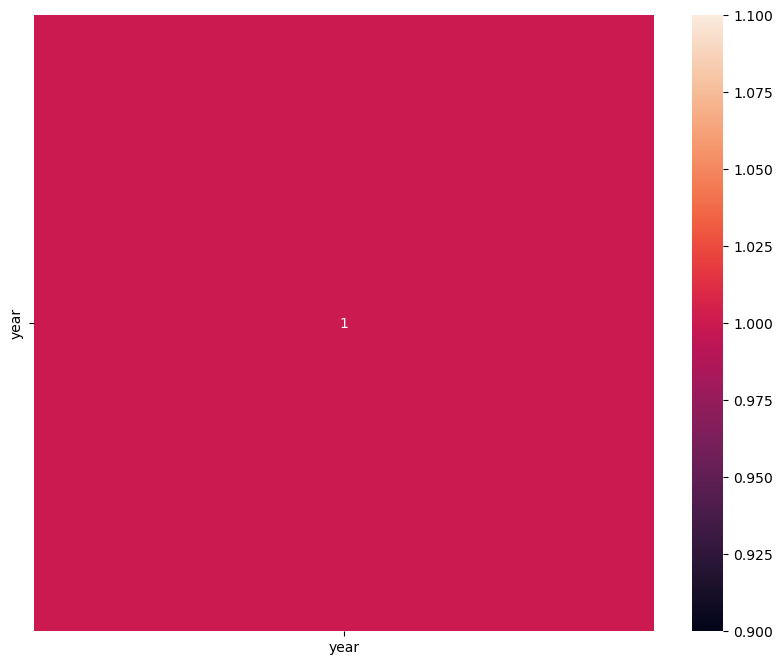

In [63]:
corr_matrix=df_filtered.corr(method='pearson', numeric_only=True)  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

C:\Users\mafal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


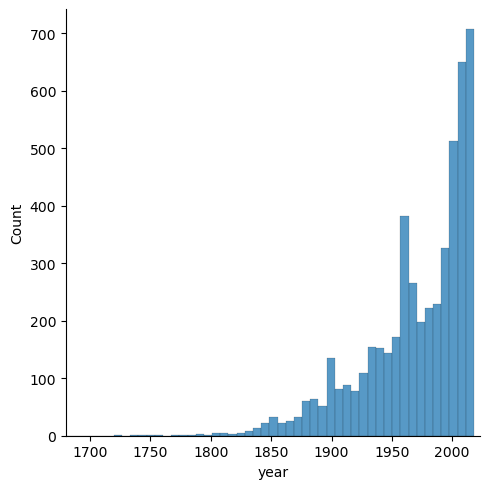

In [64]:
for col in df_filtered.select_dtypes(np.number):
    sns.displot(df_filtered[col])
    # Set the x-axis range from 1680 to 2023
    plt.xlim(1680, 2023)
    plt.show()

## 2.2 Data Processing

In [65]:
y = df_filtered['fatal(y/n/u)']
X = df_filtered.drop('fatal(y/n/u)', axis=1)

In [72]:
X = pd.get_dummies(X, columns=['type','country', 'area', 'activity', 'sex', 'age','injury', 'time', 
                               'species'])
X

KeyError: "None of [Index(['type', 'country', 'area', 'activity', 'sex', 'age', 'injury', 'time',\n       'species'],\n      dtype='object')] are in the [columns]"

In [ ]:
pd.get_dummies(df_filtered).corr()["fatal(y/n/u)_y"].sort_values()

In [ ]:
pd.get_dummies(df_filtered).corr()["fatal(y/n/u)_n"].sort_values()

In [ ]:
pd.get_dummies(df_filtered).corr()["fatal(y/n/u)_u"].sort_values()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classification = LogisticRegression(random_state=42) #, max_iter=1000

classification.fit(X_train, y_train)

In [ ]:
# get the accuracy:
classification.score(X_test, y_test)

In [ ]:
# to get predictions:
predictions = classification.predict(X_test)
predictions

In [ ]:
y_test.value_counts()

In [ ]:
# to get the probability instead
predictions_ = classification.predict_proba(X_test)
predictions_

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["n", "y", "u"], yticklabels=["n", "y", "u"])